In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn


✅ Dataset loaded successfully!
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care 

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


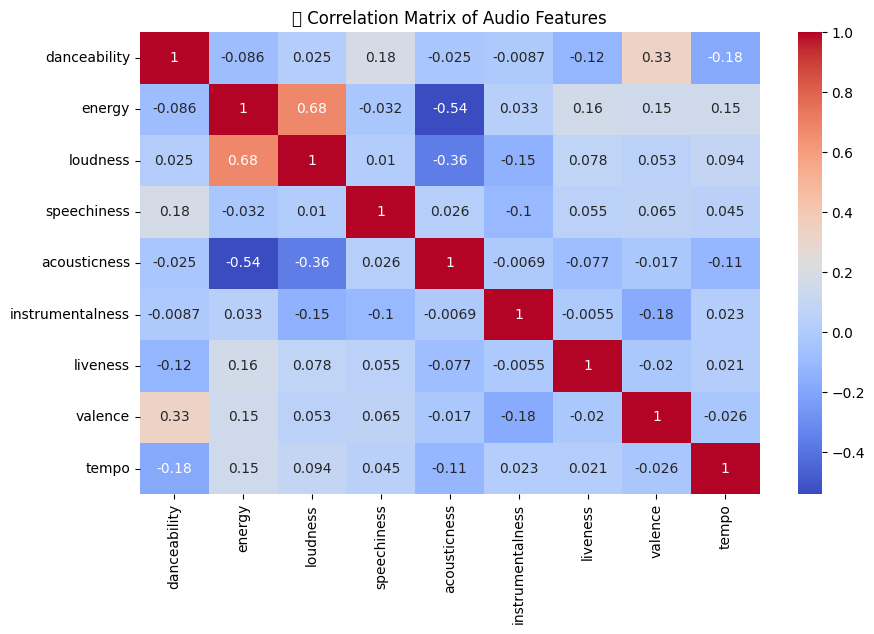

C:\Users\USER\AppData\Local\Temp\ipykernel_5500\3937017749.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data, palette='viridis')
C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


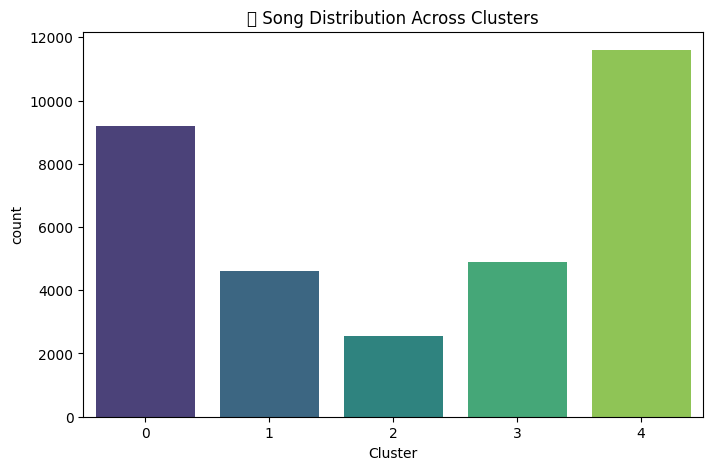


📊 Cluster-wise Feature Summary:
         danceability    energy   loudness  speechiness  acousticness  \
Cluster                                                                 
0            0.543535  0.801665  -5.269215     0.073508      0.066424   
1            0.723061  0.667979  -6.799983     0.311974      0.180624   
2            0.660745  0.783204  -6.959430     0.071778      0.076056   
3            0.602018  0.429613 -10.434331     0.072511      0.509690   
4            0.736878  0.723989  -6.216422     0.074576      0.140349   

         instrumentalness  liveness   valence       tempo  
Cluster                                                    
0                0.025282  0.244952  0.386376  131.783987  
1                0.010152  0.203323  0.548504  122.430946  
2                0.747350  0.189716  0.386380  125.077894  
3                0.087098  0.156602  0.391263  112.507043  
4                0.014690  0.155849  0.671431  114.249213  

🎵 Recommended songs similar to 'Le

,track_name,track_artist,similarity,Cluster
30682,Let Me Love You,DJ Snake,1.000000,0
20515,Let Me Love You,DJ Snake,1.000000,0
2828,Let Me Love You,DJ Snake,1.000000,0
23093,Famous,Ivy Adara,1.000000,0
29540,The World Is Mine - Rackers Remix,Mahan Moin,0.999999,0


In [5]:
# 📘 Spotify Music Recommendation System (Auto Column Detection)
# Author: Suhani Patel

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Step 2: Load dataset
data = pd.read_csv("spotify.csv")
print("✅ Dataset loaded successfully!")
print(data.head())

# Step 3: Basic info and cleaning
print("\nℹ️ Data Information:")
print(data.info())

# Drop duplicates and missing values
data = data.drop_duplicates().dropna()
print(f"\n✅ After cleaning, total records: {len(data)}")

# Step 4: Auto-detect important columns
# Try to detect track name and artist columns automatically
track_col = [col for col in data.columns if 'track' in col.lower() and 'name' in col.lower()]
artist_col = [col for col in data.columns if 'artist' in col.lower()]

# Set defaults if not found
track_col = track_col[0] if track_col else data.columns[0]
artist_col = artist_col[0] if artist_col else data.columns[1]

print(f"\n🎵 Detected Track Column: {track_col}")
print(f"🎤 Detected Artist Column: {artist_col}")

# Step 5: Select numeric features
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Only keep features that actually exist in your CSV
features = [f for f in features if f in data.columns]

# Step 6: Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

# Step 7: Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(data[features].corr(), annot=True, cmap="coolwarm")
plt.title("🎧 Correlation Matrix of Audio Features")
plt.show()

# Step 8: Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,5))
sns.countplot(x='Cluster', data=data, palette='viridis')
plt.title("🎶 Song Distribution Across Clusters")
plt.show()

# Step 9: Cluster summary
print("\n📊 Cluster-wise Feature Summary:")
print(data.groupby('Cluster')[features].mean())

# Step 10: Recommendation Function
def recommend(song_name, n=5):
    if song_name not in data[track_col].values:
        return f"❌ Song '{song_name}' not found in dataset."

    # Get feature vector for song
    song_vector = data[data[track_col] == song_name][features].values
    sim = cosine_similarity(song_vector, data[features].values)

    # Add similarity column
    data['similarity'] = sim[0]

    # Get top N similar songs
    recs = data.sort_values(by='similarity', ascending=False)[1:n+1]
    print(f"\n🎵 Recommended songs similar to '{song_name}':\n")

    return recs[[track_col, artist_col, 'similarity', 'Cluster']]

# Step 11: Try it out
recommend("Let Me Love You")
